In [1]:
# Version requirements: Python 3.14.2, numpy 2.3.5, matplotlib 3.10.8, pywt 1.8.0, scipy 1.16.3
import numpy as np
import matplotlib.pyplot as plt
import pywt

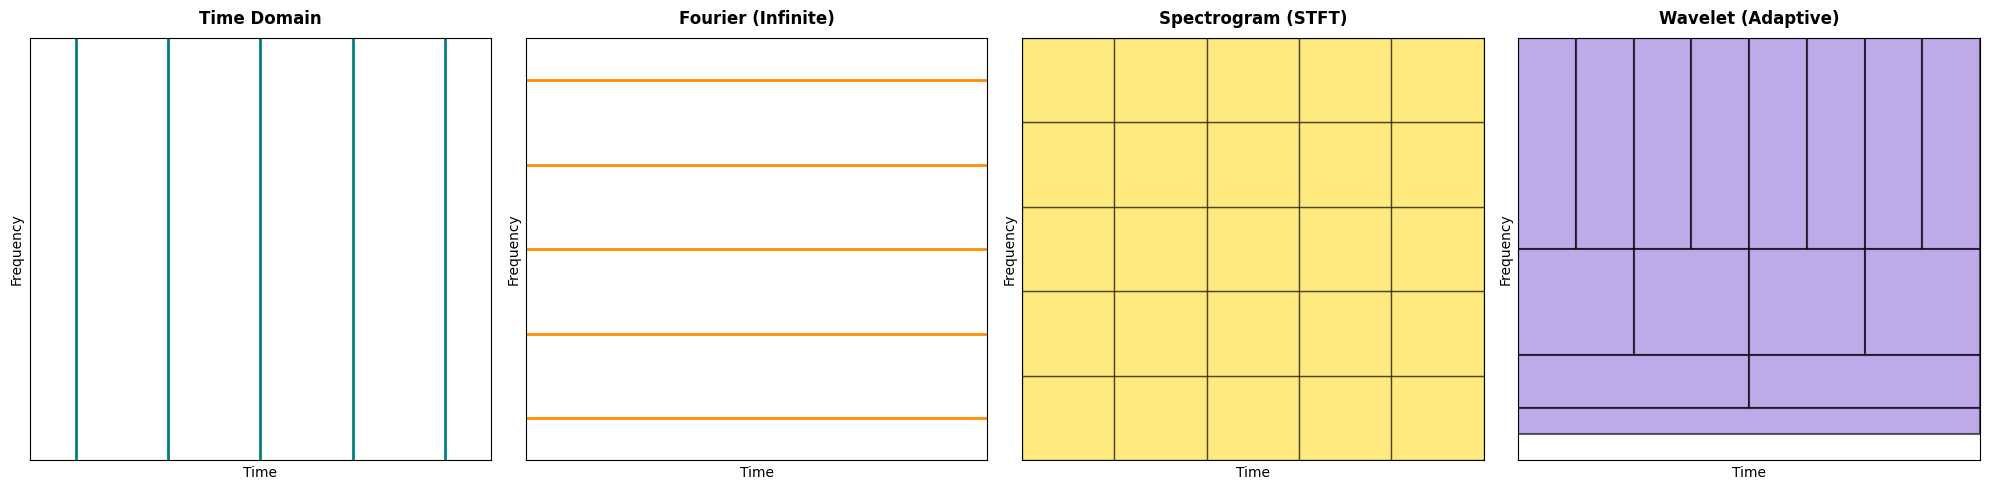

In [ ]:
import matplotlib.patches as patches

# Setup for 4 plots (Time, Fourier, Spectrogram/STFT, Wavelet)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
titles = ['Time Domain', 'Fourier (Infinite)', 'Spectrogram (STFT)', 'Wavelet (Adaptive)']

for ax, title in zip(axs, titles):
    ax.set_title(title, fontweight='bold', pad=10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])

# 1. TIME DOMAIN: Infinite frequency uncertainty
for i in range(1, 10, 2):
    axs[0].axvline(x=i, color='teal', lw=2)

# 2. FOURIER TRANSFORM: Infinite time uncertainty
for i in range(1, 10, 2):
    axs[1].axhline(y=i, color='darkorange', lw=2)

# 3. SPECTROGRAM (STFT): Fixed, uniform resolution grid
# This represents the "sliding window" FFT approach
grid_size = 5 # Fixed resolution for both axes
for i in range(grid_size):
    for j in range(grid_size):
        rect = patches.Rectangle((i*2, j*2), 2, 2, 
                                 linewidth=1, edgecolor='black', 
                                 facecolor='gold', alpha=0.5)
        axs[2].add_patch(rect)

# 4. WAVELET TRANSFORM: Adaptive resolution (Multiresolution)
levels = 4
for level in range(levels):
    freq_bottom = 10 / (2**(level+1))
    freq_top = 10 / (2**level)
    height = freq_top - freq_bottom
    num_boxes = 2**(levels - level - 1)
    width = 10 / num_boxes
    
    for k in range(num_boxes):
        rect = patches.Rectangle((k * width, freq_bottom), width, height, 
                                 linewidth=1.5, edgecolor='black', 
                                 facecolor='mediumpurple', alpha=0.6)
        axs[3].add_patch(rect)

plt.tight_layout()
plt.show()
# Time Series: Verticals = High Time Resolution / Low Freq Resolution.

# Fourier: Horizontals = Low Time Resolution / High Freq Resolution.

# Spectrogram: Short-time Fourier Transform, breaks the signal into "windows",
# treating high frequency part of the signal equal to the low frequency details 

# Wavelet: Tiles = Balanced Resolution (Adaptive). Breaks the signal into adaptive windows
# which scales based on frequency.

# Note, resolution can be thought of with Heisenberg's uncertainty principle with tradeoff between time and frequency.
# Wavelets, says we are more interrested in the time compoents for higher frequencies. 


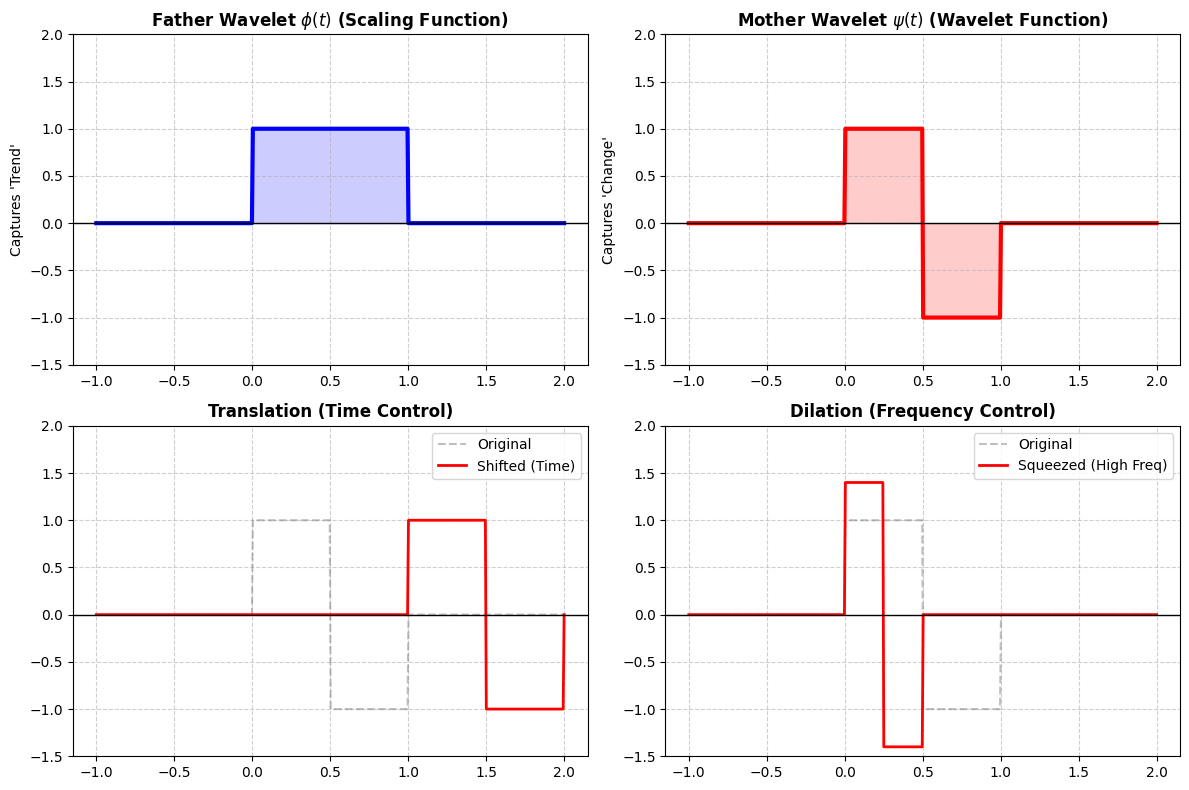

In [ ]:
def illustrate_father_mother():
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    
    # Time axis
    t = np.linspace(-1, 2, 500)
    
    # 1. THE FATHER (Scaling Function - Approximation)
    phi = np.where((t >= 0) & (t < 1), 1, 0)
    axs[0, 0].plot(t, phi, color='blue', lw=3)
    axs[0, 0].set_title("Father Wavelet $\\phi(t)$ (Scaling Function)", fontweight='bold')
    axs[0, 0].fill_between(t, phi, alpha=0.2, color='blue')
    axs[0, 0].set_ylabel("Captures 'Trend'")
    
    # 2. THE MOTHER (Wavelet Function - Detail)
    psi = np.where((t >= 0) & (t < 0.5), 1, np.where((t >= 0.5) & (t < 1), -1, 0))
    axs[0, 1].plot(t, psi, color='red', lw=3)
    axs[0, 1].set_title("Mother Wavelet $\\psi(t)$ (Wavelet Function)", fontweight='bold')
    axs[0, 1].fill_between(t, psi, alpha=0.2, color='red')
    axs[0, 1].set_ylabel("Captures 'Change'")

    # 3. DILATION (Scaling)
    psi_squeezed = np.where((t >= 0) & (t < 0.25), 1.4, np.where((t >= 0.25) & (t < 0.5), -1.4, 0))
    axs[1, 1].plot(t, psi, '--', color='grey', alpha=0.5)
    axs[1, 1].plot(t, psi_squeezed, color='red', lw=2)
    axs[1, 1].set_title("Dilation (Frequency Control)", fontweight='bold')
    axs[1, 1].legend(['Original', 'Squeezed (High Freq)'])

    # 4. TRANSLATION (Shifting)
    psi_shifted = np.where((t >= 1) & (t < 1.5), 1, np.where((t >= 1.5) & (t < 2), -1, 0))
    axs[1, 0].plot(t, psi, '--', color='grey', alpha=0.5)
    axs[1, 0].plot(t, psi_shifted, color='red', lw=2)
    axs[1, 0].set_title("Translation (Time Control)", fontweight='bold')
    axs[1, 0].legend(['Original', 'Shifted (Time)'])

    for ax in axs.flat:
        ax.axhline(0, color='black', lw=1)
        ax.set_ylim(-1.5, 2)
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

illustrate_father_mother()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# 1. Signal Setup
N = 8
t = np.arange(N)
signal = np.array([0, 2, 4, 6, 6, 4, 2, 0])

# 2. Define UI Elements
level_slider = widgets.IntSlider(min=1, max=10, step=1, value=1, description='Level')
pos_slider = widgets.IntSlider(min=0, max=(N//2)-1, step=1, value=0, description='Position')
filter_type = widgets.Dropdown(options=['Low-pass (Father)', 'High-pass (Mother)'], value='High-pass (Mother)', description='Filter')
wavelet_name = widgets.Dropdown(options=['haar', 'db4', 'sym8'], value='haar', description='Wavelet')

# 3. Link Level to Position Slider Max
def update_pos_max(*args):
    stride = 2**level_slider.value
    new_max = (N // stride) - 1
    pos_slider.max = max(0, new_max)
    # Reset position to 0 if it's out of bounds
    if pos_slider.value > new_max:
        pos_slider.value = 0

level_slider.observe(update_pos_max, 'value')

# 4. The Plotting Function
def plot_inner_product(level, position_index, filter_type, wavelet_name):
    wavelet = pywt.Wavelet(wavelet_name)
    mode = 'a' if filter_type == 'Low-pass (Father)' else 'd'
    wavelet_data = pywt.upcoef(mode, [1.0], wavelet, level=level)
    
    stride = 2**level
    actual_pos = (position_index * stride) + (stride // 2)
    
    filter_size = len(wavelet_data)
    filter_window = np.zeros(N)
    
    start = actual_pos - filter_size // 2
    end = start + filter_size
    
    if start < N and end > 0:
        win_start = max(0, start)
        win_end = min(N, end)
        filt_start = max(0, -start)
        filt_end = filt_start + (win_end - win_start)
        filter_window[win_start:win_end] = wavelet_data[filt_start:filt_end]

    contributions = signal * filter_window
    total_coeff = np.sum(contributions) * (np.sqrt(2)**level)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    ax1.plot(t, signal, 'k', alpha=0.3)
    vis_scale = (2**(level/2)) 
    ax1.plot(t, filter_window * vis_scale, color='blue', lw=1.5)
    ax1.set_title(f"Level {level} | Step {position_index} (Stride {stride})\nNormalized Coeff: {total_coeff:.4f}")
    
    ax2.axhline(0, color='black', lw=1)
    ax2.fill_between(t, contributions * (np.sqrt(2)**level), 0, where=(contributions > 0), color='green', alpha=0.6)
    ax2.fill_between(t, contributions * (np.sqrt(2)**level), 0, where=(contributions < 0), color='red', alpha=0.6)
    
    if N <= 16:
        ax1.set_xlim(-0.5, N - 0.5)
    else:
        zoom_width = (N * 0.1) / (2**(level-1)) if level < 6 else N * 0.5
        ax1.set_xlim(max(0, actual_pos - zoom_width), min(N, actual_pos + zoom_width))
    
    plt.tight_layout()
    plt.show()

# 5. Display UI
ui = widgets.VBox([widgets.HBox([level_slider, pos_slider]), widgets.HBox([filter_type, wavelet_name])])
out = widgets.interactive_output(plot_inner_product, {
    'level': level_slider,
    'position_index': pos_slider,
    'filter_type': filter_type,
    'wavelet_name': wavelet_name
})

display(ui, out)

Output()

$\textbf{Performing Discrete Wavelet Transform}$


The Haar transform decomposes a signal by looking at pairs of numbers.
1. Approximation ($A$): The average of the pair: $\frac{x_1 + x_2}{2}$ (multiplied by $\sqrt{2}$ for energy normalization).
2. Detail ($D$): The difference of the pair: $\frac{x_1 - x_2}{2}$ (multiplied by $\sqrt{2}$ for energy normalization).

Here we have the signal $$S = [0, 2, 4, 6, 6, 4, 2, 0]$$

In this example we will calculate the unnormalized version (Simplle average & difference)

We start with the level 1 decomposition.

Approximations ($A_1$):$$(0+2)/2 = 1 $$ $$(4+6)/2 = 5 $$ $$(6+4)/2 = 5$$ $$(2+0)/2 = 1$$

Details ($D_1$): $$ (0-2)/2 = -1 $$ $$ (4-6)/2 = -1 $$ $$ (6-4)/2 = 1 $$ $$ (2-0) = 1 $$



Level 2 Decomposition.

We now take $A_1$ and decompose it. We have the following pairs (1,5), (5,1)

Approximations ($A_2$):
$$(1+5)/2 = 3 $$ $$ (5+1)/2 = 3 $$

Details ($D_2):
$$(1-5)/2 = -2 $$ $$ (5-1)/2 = 2 $$

Level 3 Decomposition

We will finnaly take $A_2$, (3,3).

Approximation ($A_3$):
$$ (3+3)/2 = 3$$
Details($D_3$):
$$(3-3)/2 = 0$$

The final "Wavelet Coefficient" vector is formed by taking the last Approximation and all preceding Details:

$$[A_3, D_3, D_2, D_1] = [3,0,-2,2,-1,-1,1,1]$$

In [24]:
# Define the signal
signal = np.array([0, 2, 4, 6, 6, 4, 2, 0])

# Perform the DWT using the Haar wavelet
# 'haar' is equivalent to 'db1'
coeffs = pywt.wavedec(signal, 'haar', level=3)

# Extract levels
A3, D3, D2, D1 = coeffs

print("Original Signal: ", signal)
print("---" * 10)
print("Level 3 Approx (A3):", A3 / np.sqrt(2)**3)
print("Level 3 Detail (D3):", D3 / np.sqrt(2)**3)
print("Level 2 Detail (D2):", D2 / (np.sqrt(2))**2)
print("Level 1 Detail (D1):", D1 / np.sqrt(2))

Original Signal:  [0 2 4 6 6 4 2 0]
------------------------------
Level 3 Approx (A3): [3.]
Level 3 Detail (D3): [0.]
Level 2 Detail (D2): [-2.  2.]
Level 1 Detail (D1): [-1. -1.  1.  1.]


$\textbf{Performing Inverse Discrete Wavelet Transform}$

The logic is the exact mirror of the decomposition: instead of taking averages and differences, we take the sum and difference of the Approximation and Detail to recover the previous level.

In the case of the Haar wavelet, the recovery formula for a pair ($x_1$,$x_2$) from its Approximation ($A$) and Detail ($D$) is:$$x_1 = A + D$$ $$x_2 = A - D$$

So we have the following:
$$[A_3, D_3, D_2, D_1] = [3,0,-2,2,-1,-1,1,1]$$

Level 3 $\to$ Level 2: Utilize $A_3$ & $D_3$

$$ 3 + 0 = 3  \quad \textrm{\&} \quad  3 - 0 = 3$$


Level 2 $\to$ Level 1: Use $A_2$ & $D_2$ pairwise:

Pair 1 : $ 3 + (-2) = 1, 3 - (-2) = 5$

Pair 2 : $ 3 + 2 = 5, 3 - 2 = 1$ 

So $A_1$  is $[1,5,5,1]$

Level 1 $\to$ Signal: Use $A_1$ & $D_1$ pairwise:

Pair 1 : $ 1 + (-1) = 0, 1 - (-1) = 2$

Pair 2 : $ 5 + (-1) = 4, 5 - (-1) = 6$

Pair 3 : $ 5 + 1 = 6, 5 - 1 = 4$

Pair 4 : $ 1 +1 = 2, 1 - 1 = 0$

So the final result gives us our signal: 
$[0, 2, 4, 6, 6, 4, 2, 0]$ 


In [26]:
reconstructed_signal = pywt.waverec(coeffs, 'haar')

print("Reconstructed Signal:")
print(np.round(reconstructed_signal,1))

Reconstructed Signal:
[-0.  2.  4.  6.  6.  4.  2. -0.]


Example 1, The Square wave (Haar Wavelet)


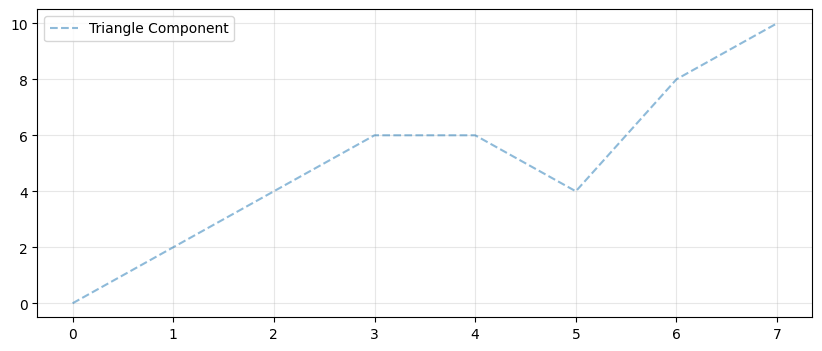

Signal Data Points: [ 0  2  4  6  6  4  8 10]


In [12]:
# 1. Define a Triangle Signal (Ramp up and down)
signal = np.array([0, 2, 4, 6, 6, 4, 8, 10])
# Visualization
plt.figure(figsize=(10, 4))
plt.plot(signal, '--', label='Triangle Component', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print("Signal Data Points:", signal)

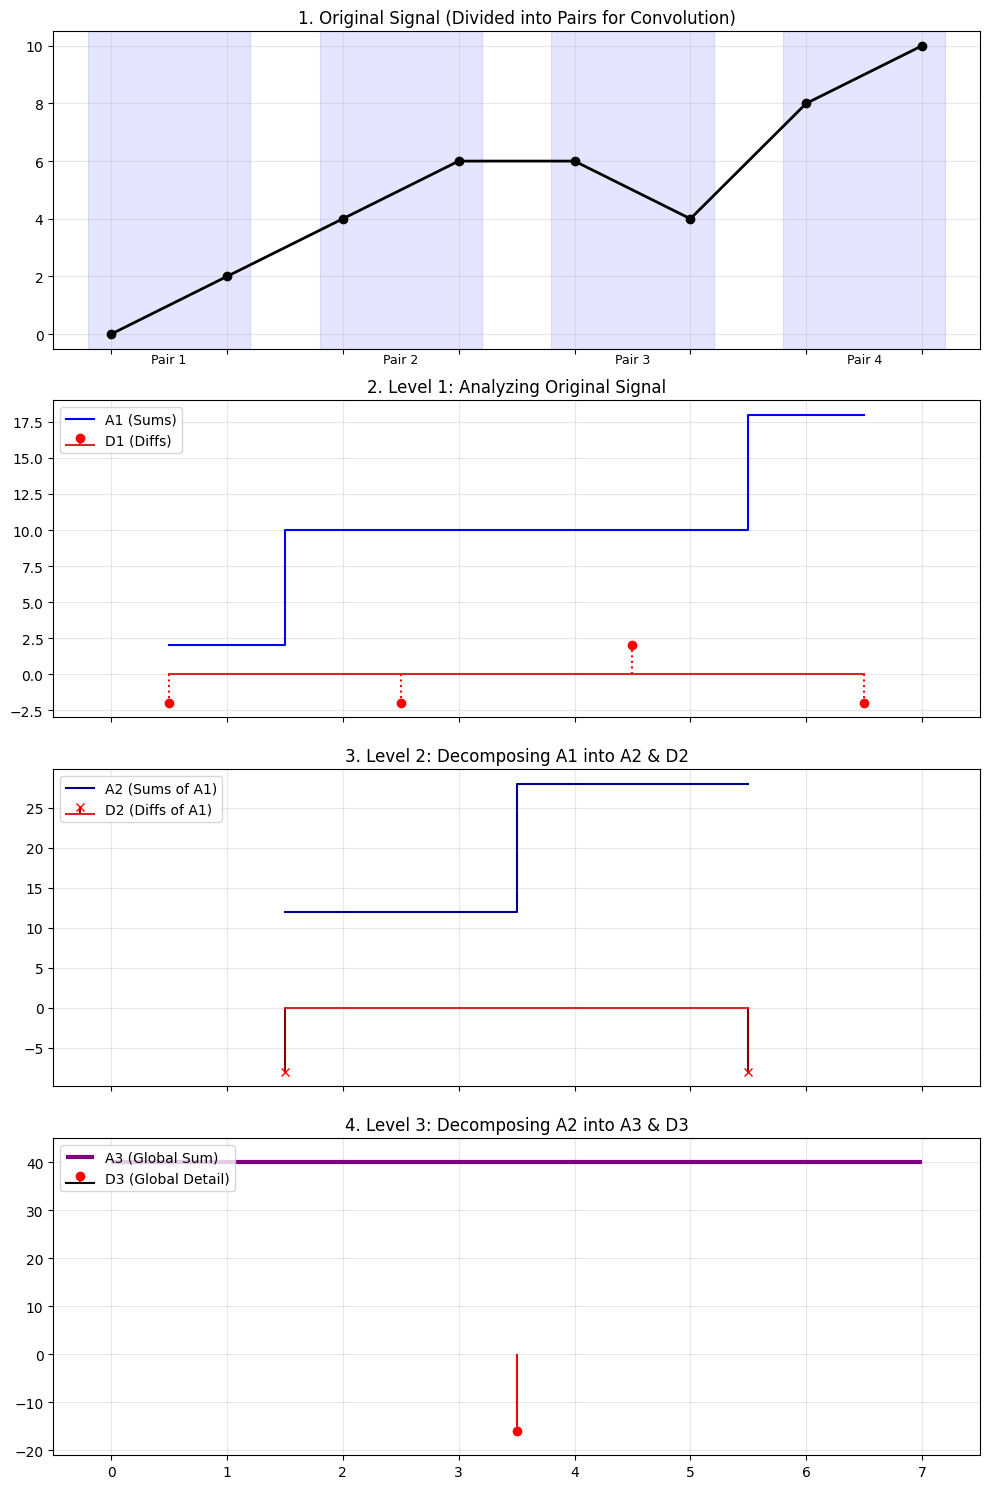

In [ ]:
# 1. Data Setup
signal = np.array([0, 2, 4, 6, 6, 4, 8, 10])
x = np.arange(len(signal))

# Level 1 (From pairs in Original Signal)
# Pairs: (0,2), (4,6), (6,4), (8,10)
cA1 = np.array([2, 10, 10, 18]) 
cD1 = np.array([-2, -2, 2, -2])
x1 = np.array([0.5, 2.5, 4.5, 6.5])

# Level 2 (From pairs in cA1)
# Pairs: (2, 10), (10, 18)
cA2 = np.array([12, 28])
cD2 = np.array([-8, -8])
x2 = np.array([1.5, 5.5])

# Level 3 (From pair in cA2)
# Pair: (12, 28)
cA3 = np.array([40])
cD3 = np.array([-16])
x3 = np.array([3.5])

# --- 2. Plotting ---
fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# 1. Original Signal
axs[0].plot(x, signal, 'ko-', label="Original Signal (S)", linewidth=2)
for i in range(0, 8, 2):
    axs[0].axvspan(i-0.2, i+1.2, alpha=0.1, color='blue')
    axs[0].text(i+0.5, -1, f"Pair {i//2 + 1}", ha='center', fontsize=9)
axs[0].set_title("1. Original Signal (Divided into Pairs for Convolution)")
axs[0].grid(True, alpha=0.3)

# 2. Level 1 (Approx & Detail)
axs[1].step(x1, cA1, where='mid', color='blue', label="A1 (Sums)")
axs[1].stem(x1, cD1, linefmt='r:', markerfmt='ro', label="D1 (Diffs)")
axs[1].set_title("2. Level 1: Analyzing Original Signal")
axs[1].legend(loc='upper left')

# 3. Level 2 (Approx & Detail)
axs[2].step(x2, cA2, where='mid', color='darkblue', label="A2 (Sums of A1)")
axs[2].stem(x2, cD2, linefmt='darkred', markerfmt='rx', label="D2 (Diffs of A1)")
axs[2].set_title("3. Level 2: Decomposing A1 into A2 & D2")
axs[2].legend(loc='upper left')

# 4. Level 3 (Final Approx & Detail)
# 1. Plot A3 as a horizontal line across the whole range [0, 7]
axs[3].hlines(y=cA3, xmin=0, xmax=7, color='purple', linewidth=3, label="A3 (Global Sum)")

# 2. Plot D3 as a stem at the center
# We use a larger marker to make the "Global Detail" stand out
axs[3].stem([x3], [cD3], linefmt='r-', markerfmt='ro', basefmt='k-', label="D3 (Global Detail)")
axs[3].set_ylim(min(cD3)-5, cA3+5)
axs[3].set_xlim(-0.5,7.5)
axs[3].set_title("4. Level 3: Decomposing A2 into A3 & D3")
axs[3].legend(loc='upper left')

for ax in axs:
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.5, 7.5)

plt.tight_layout()
plt.show()

$\textbf{Denoising a signal with Discreet Wavelets}$


Noisy Signal: [-0.20837892  1.97186659  2.93190195  6.8201354   5.10328221  3.57912632
  2.25144071 -0.62264404]


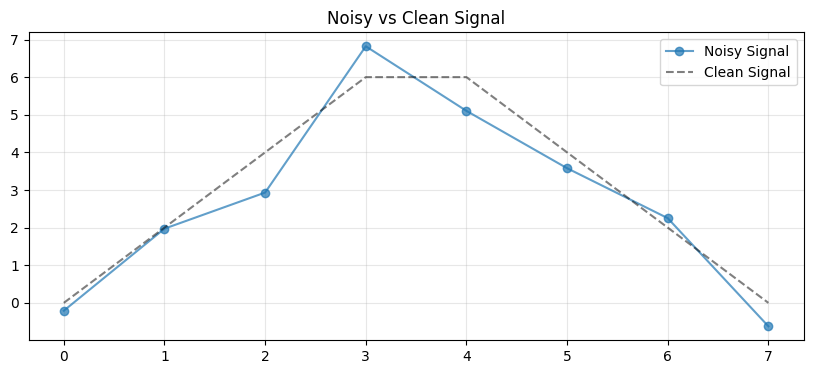

Noisy Coefficients:
cA2: [11.51552502 10.31120519]
cD2: [-7.98854969  7.05361186]
cD1: [-2.18024551 -3.88823345  1.52415589  2.87408475]


In [40]:
np.random.seed(2)

signal_clean = np.array([0, 2, 4, 6, 6, 4, 2, 0])
noise = np.random.normal(0, 0.5, signal_clean.shape)
signal_noisy = signal_clean + noise
print("Noisy Signal:", signal_noisy)

plt.figure(figsize=(10, 4))
plt.plot(signal_noisy, 'o-', label='Noisy Signal', alpha=0.7)
plt.plot(signal_clean, 'k--', label='Clean Signal', alpha=0.5)
plt.title("Noisy vs Clean Signal")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

coeffs_noisy = pywt.wavedec(signal_noisy, 'haar', level=2)
cA2_noisy, cD2_noisy, cD1_noisy = coeffs_noisy

print("Noisy Coefficients:")
print("cA2:", cA2_noisy*2)
print("cD2:", cD2_noisy*2)
print("cD1:", cD1_noisy*np.sqrt(2))

In [ ]:
# Now you can apply thresholding to cD1_noisy and cD2_noisy to denoise the signal
threshold = 1.5
cD1_denoised = pywt.threshold(cD1_noisy, threshold, mode='hard')
cD2_denoised = pywt.threshold(cD2_noisy, threshold, mode='hard')

denoised_coeffs = [cA2_noisy, cD2_denoised, cD1_denoised]
print(f'cD1_denoised: {cD1_denoised*np.sqrt(2)}')
print(f'cD2_denoised: {cD2_denoised}')
print(f'cA2_noisy: {cA2_noisy}')

# We are setting coefficients which are below the threshold to 0

cD1_denoised: [-2.18024551 -3.88823345  0.          2.87408475]
cD2_denoised: [-3.99427485  3.52680593]
cA2_noisy: [5.75776251 5.15560259]


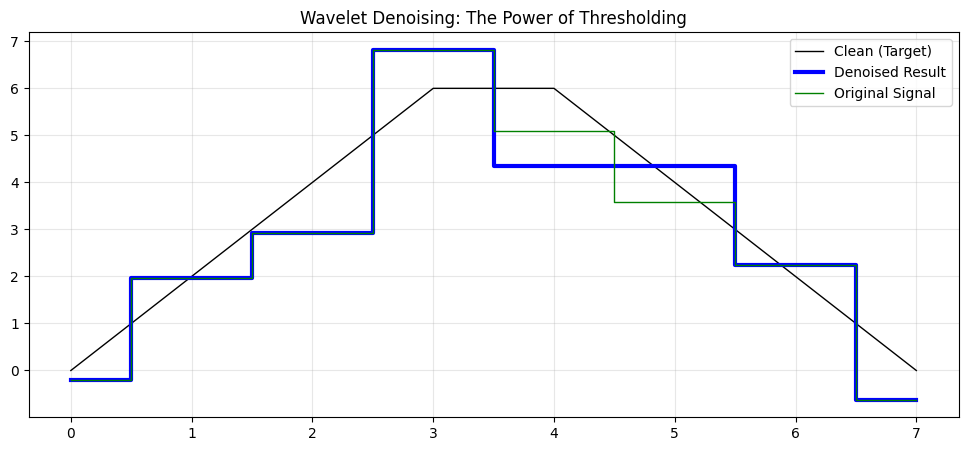

In [45]:
signal_denoised = pywt.waverec(denoised_coeffs, 'haar')

# Plot the results side-by-side
plt.figure(figsize=(12, 5))


#plt.plot(signal_noisy, 'r--', alpha=0.5, label="Noisy Signal")
plt.plot(signal_clean, 'k-', linewidth=1, label="Clean (Target)")
plt.step(np.arange(8), signal_denoised, 'b-', where='mid', linewidth=3, label="Denoised Result")
plt.step(np.arange(8), signal_noisy, 'g-', where='mid', linewidth=1, label="Original Signal")

plt.title("Wavelet Denoising: The Power of Thresholding")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

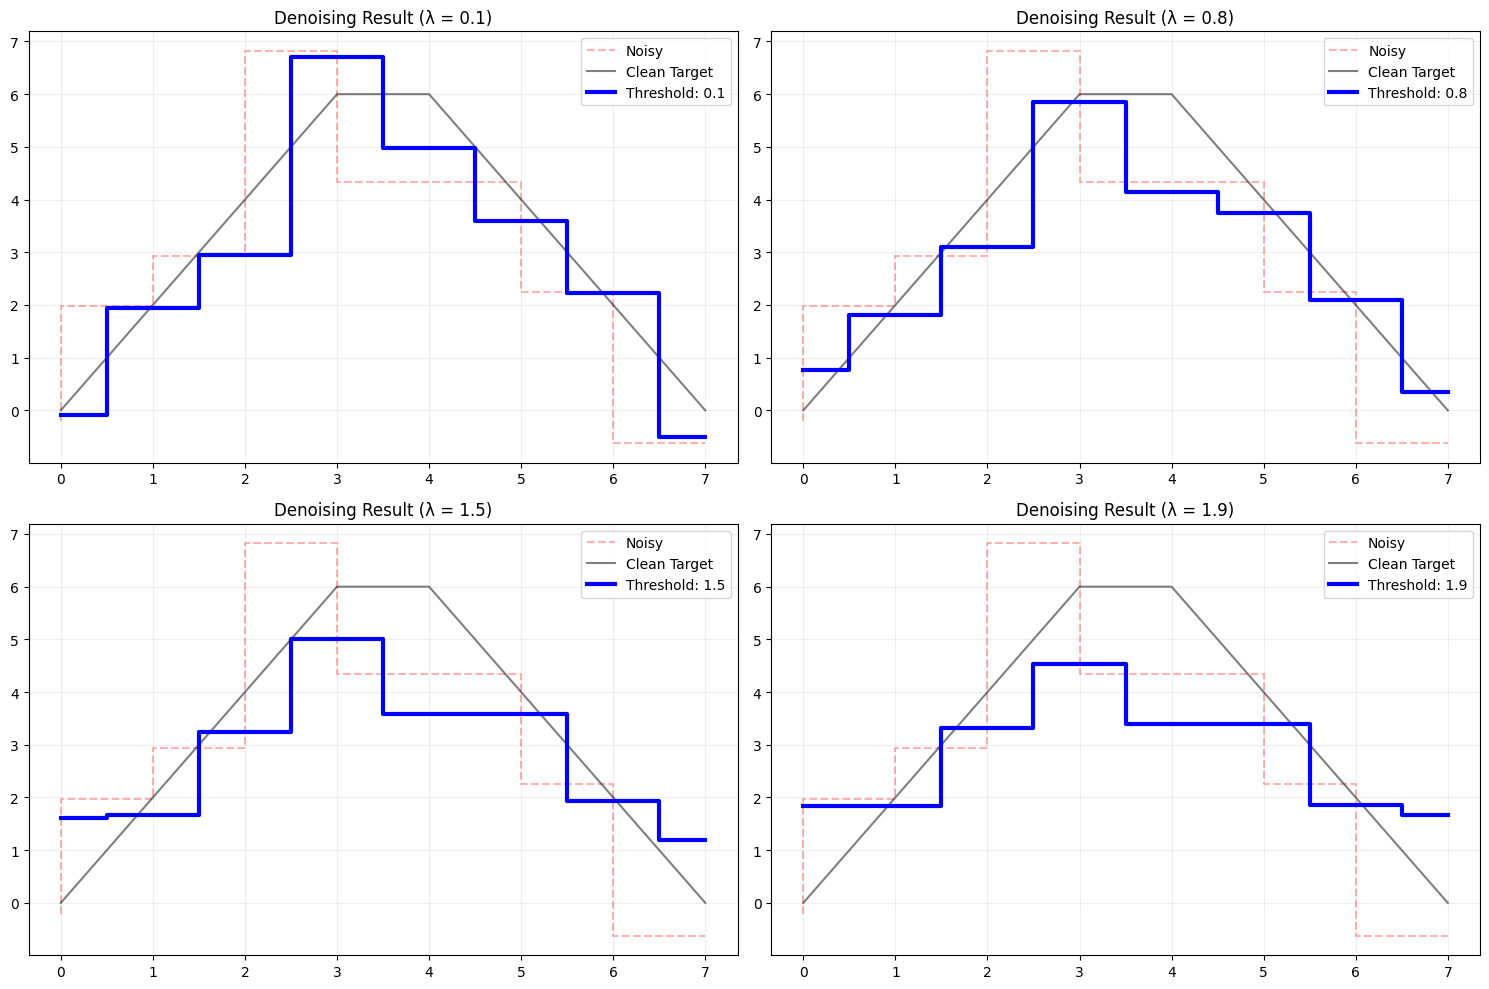

In [52]:
# 2. Decompose (Level 2 Haar)
coeffs = pywt.wavedec(signal_noisy, 'haar', level=2)
cA2, cD2, cD1 = coeffs

# 3. Define the Thresholds to test
test_thresholds = [0.1, 0.8, 1.5, 1.9]

# 4. Create the Loop for visualization
plt.figure(figsize=(15, 10))

for i, val in enumerate(test_thresholds):
    # Apply hard thresholding to both levels of details
    cD2_t = pywt.threshold(cD2, val, mode='soft')
    cD1_t = pywt.threshold(cD1, val, mode='soft')
    
    # Reconstruct
    denoised = pywt.waverec([cA2, cD2_t, cD1_t], 'haar')
    
    # Plotting
    plt.subplot(2, 2, i+1)
    plt.step(np.arange(8), signal_denoised,'r--', alpha=0.3, label="Noisy")
    plt.plot(signal_clean, 'k-', alpha=0.5, label="Clean Target")
    plt.step(np.arange(8), denoised, 'b-', where='mid', linewidth=3, label=f"Threshold: {val}")
    
    plt.title(f"Denoising Result (λ = {val})")
    plt.legend()
    plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Note, play around with soft vs hard thresholding

$\textbf{Example 2, A sine wave}$

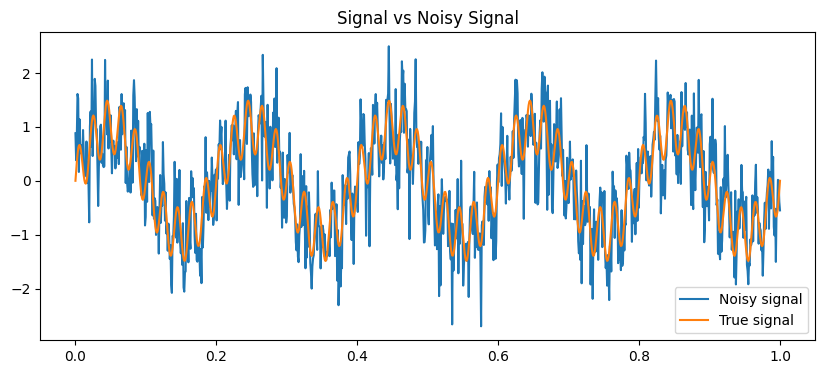

In [56]:
np.random.seed(0)

# clean signal: slow + fast components
x = np.linspace(0, 1, 1024)

signal = np.sin(2 * np.pi * 5 * x) + 0.5 * np.sin(2 * np.pi * 50 * x)

# add gaussian noise
noise = 0.5 * np.random.normal(size=x.shape)
noisy_signal = signal + noise

plt.figure(figsize=(10,4))
plt.plot(x, noisy_signal, label="Noisy signal")
plt.plot(x, signal, label="True signal")
plt.legend()
plt.title("Signal vs Noisy Signal")
plt.show()


In [57]:
# Perform discrete wavelet transform
wavelet = "db4"   # Daubechies-4
coeffs = pywt.wavedec(noisy_signal, wavelet, level=4)

approximation = coeffs[0]
details = coeffs[1:]
len(coeffs), [len(c) for c in coeffs]

# Coeffs is a list where the first element is the approximation coefficients and the following elements are the detail coefficients at each level.
# Which are corresponding to low (approximation) and high (detail) frequency components respectively.

(5, [70, 70, 134, 261, 515])

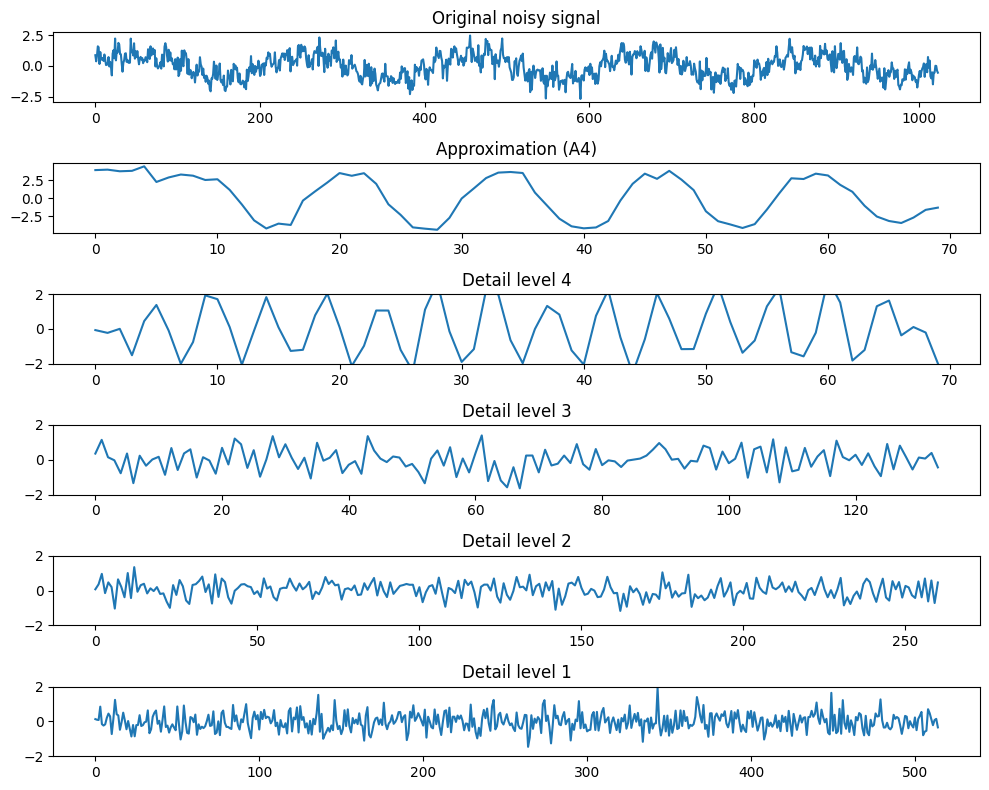

In [58]:
plt.figure(figsize=(10,8))
plt.subplot(6,1,1)
plt.plot(noisy_signal)
plt.title("Original noisy signal")
plt.subplot(6,1,2)
plt.plot(approximation)
plt.title("Approximation (A4)")
lims = (-2, 2)
for i, d in enumerate(details, start=1):
    level = 5 - i
    plt.subplot(6,1,i+2)
    plt.plot(d)
    plt.ylim(lims)
    plt.title(f"Detail level {level}")

plt.tight_layout()
plt.show()


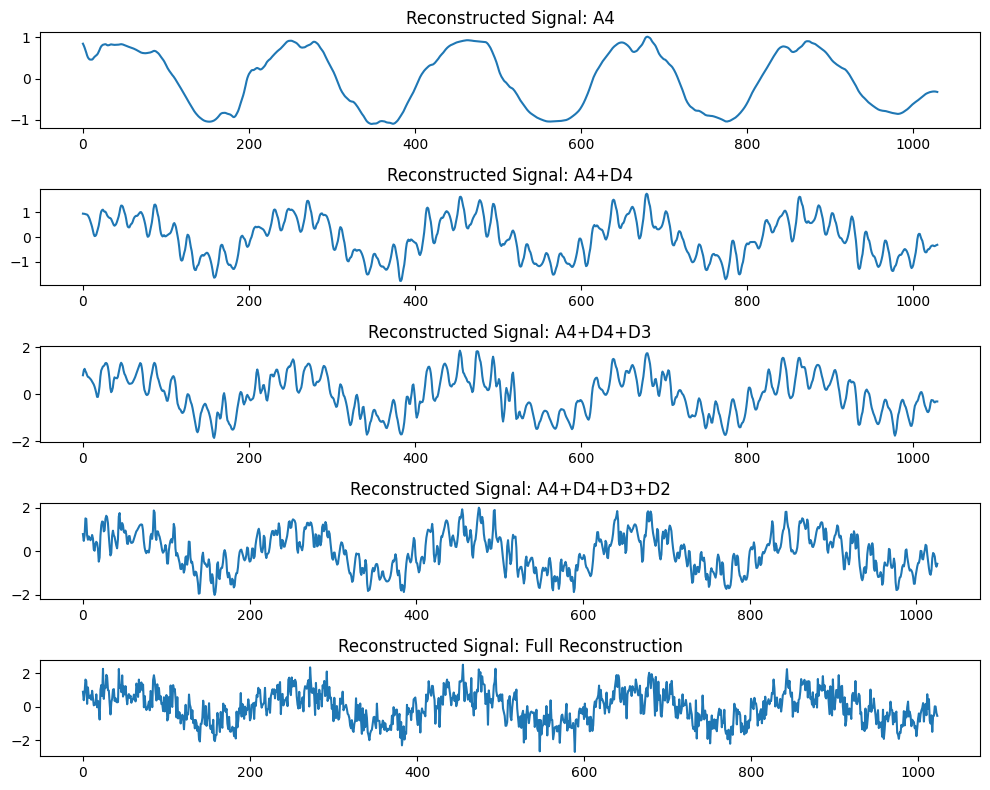

In [59]:
# Here reconstruction of the signal from components step by step
recon_A4 = pywt.waverec([approximation, None, None, None, None], 'db4')
recon_A4_D4 = pywt.waverec([approximation, details[0], None, None, None], 'db4')
recon_A4_D4_D3 = pywt.waverec([approximation, details[0], details[1], None, None], 'db4')
recon_A4_D4_D3_D2 = pywt.waverec([approximation, details[0], details[1], details[2], None], 'db4')
reconstructed_signal = pywt.waverec(coeffs, 'db4')

signals = [recon_A4, recon_A4_D4, recon_A4_D4_D3, recon_A4_D4_D3_D2, reconstructed_signal]
labels = ['A4', 'A4+D4', 'A4+D4+D3', 'A4+D4+D3+D2', 'Full Reconstruction']

plt.figure(figsize=(10,8))
for i, (sig, label) in enumerate(zip(signals, labels), start=1):
    plt.subplot(5,1,i)
    plt.plot(sig)
    plt.title(f"Reconstructed Signal: {label}")
plt.tight_layout()
plt.show()

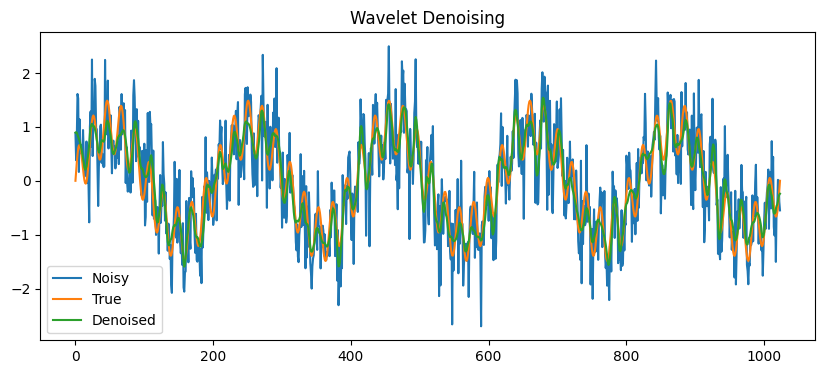

In [60]:
# 1. Decompose
coeffs = pywt.wavedec(noisy_signal, wavelet, level=4)

# 2. Estimate noise and calculate threshold
# Using the finest detail level (the last element in the list)
sigma = np.median(np.abs(coeffs[-1])) / 0.6745
n = len(noisy_signal)
universal_thresh = sigma * np.sqrt(2 * np.log(n))

# 3. Apply Thresholding
denoised_coeffs = [coeffs[0]] 

# Iterate through cD4, cD3, cD2, cD1
for i, d in enumerate(coeffs[1:]):
    # Level-dependent scaling: i=0 is coarsest (D4), i=3 is finest (D1)
    # Usually, finer scales (higher index) need more aggressive thresholding
    level_scale = (i + 1) / len(coeffs[1:]) 
    level_threshold = universal_thresh * level_scale
    
    # Threshold the detail array and add it to our list
    clean_d = pywt.threshold(d, level_threshold, mode='soft')
    denoised_coeffs.append(clean_d)

# 4. Reconstruct
denoised_signal = pywt.waverec(denoised_coeffs, wavelet)

plt.figure(figsize=(10,4))
plt.plot(noisy_signal, label="Noisy")
plt.plot(signal, label="True")
plt.plot(denoised_signal, label="Denoised")
plt.legend()
plt.title("Wavelet Denoising")
plt.show()

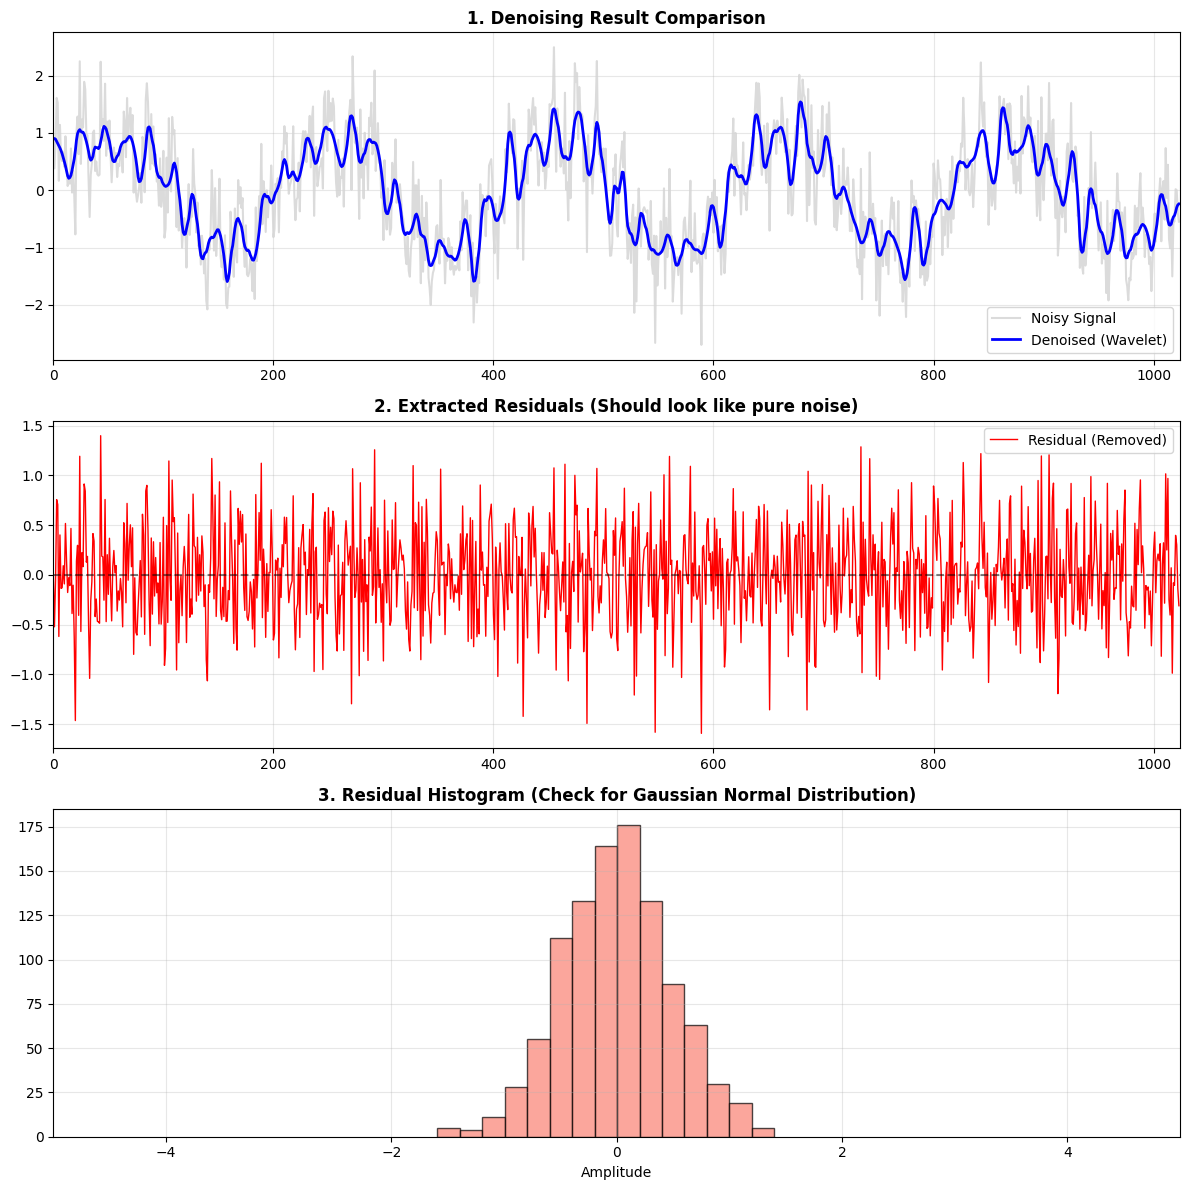

In [67]:
# Calculate the residual (what was removed)
residual = noisy_signal - denoised_signal

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# 1. Noisy vs Denoised
axs[0].plot(noisy_signal, color='lightgray', label='Noisy Signal', alpha=0.8)
axs[0].plot(denoised_signal, color='blue', linewidth=2, label='Denoised (Wavelet)')
axs[0].set_xlim(0,1024)
axs[0].set_title("1. Denoising Result Comparison", fontweight='bold')
axs[0].legend()

# 2. The Residual (The "Noise" extracted)
axs[1].plot(residual, color='red', linewidth=1, label='Residual (Removed)')
axs[1].axhline(0, color='black', linestyle='--', alpha=0.5)
axs[1].set_xlim(0,1024)
axs[1].set_title("2. Extracted Residuals (Should look like pure noise)", fontweight='bold')
axs[1].legend()

# 3. Validation: Residual Distribution
# A good denoising process leaves a Gaussian (Normal) distribution of noise
axs[2].hist(residual, bins=15, color='salmon', edgecolor='black', alpha=0.7)
axs[2].set_xlim(-5,5)
axs[2].set_title("3. Residual Histogram (Check for Gaussian Normal Distribution)", fontweight='bold')
axs[2].set_xlabel("Amplitude")

for ax in axs:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()